Autores:
- Hernán Francisco Díaz Farías
- María Angélica Parra Mendoza
- Loreto Constanza Zavala Gaete

# Tarea 1
### Realice una exploración de datos para ver que datos existen, cuales de ellos entregan información relevante para el problema y cuales no, eliminación (si corresponde) de datos nulos y duplicados, entre otros.

#### Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from fcmeans import FCM

#### Cargar el archivo csv

In [2]:
# Cargar el archivo csv
df = (
    pd.read_csv(
        '../data/apartments_for_rent_classified_100K.csv',
        encoding='ISO-8859-1',
        sep=';',
        low_memory=False # Para evitar warnings de dtype
        )
    )

#### Visualización de los datos

In [3]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,"$2,20",Monthly,542,507 509 Esplanade,Redondo Beach,CA,338.520,-1.183.759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,"$1,25",Monthly,1500,146 Lochview Dr,Newport News,VA,370.867,-764.941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,"$1,40",Monthly,1650,3101 Morningside Dr,Raleigh,NC,358.230,-786.438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,"$1,60",Monthly,820,209 Aegean Way,Vacaville,CA,383.622,-1.219.712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,351.038,-1.066.110,RentLingo,1.577360e+09


In [4]:
df.dtypes

id                object
category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude         object
source            object
time             float64
dtype: object

Los campos tipo object representan campos que pueden contener registros nulos o errores de escritura. Se revisará el campo **id** para empezar.

In [5]:
df['id'].isnull().sum()

0

Creamos una función para revisar si el campo **id** es numérico o no.

In [6]:
def check_id(id):
    try:
        int(id)
        return True
    except:
        return False

numericos = df['id'].apply(check_id).sum()
no_numericos = df['id'].shape[0] - numericos
print(f'Numericos: {numericos}, No numéricos: {no_numericos}')


Numericos: 99823, No numéricos: 3


Se observa que hay 3 registros que no son numéricos. Se revisarán estos registros.

In [7]:
df[~df['id'].apply(check_id)]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
8808,ange of on-site community amenities. Coming so...,Gym,1,1,USD,No,Thumbnail,"Cats,Dogs",1380,"$1,38",...,NaN,Lawrence,NJ,402.659,-746.959,RentDigs.com,1.568782e+09,NaN,NaN,NaN
33780,xpansive rooftop entertainment deck and many p...,"Parking,Patio/Deck",1,1,USD,No,Thumbnail,NaN,2150,"$2,15",...,NaN,Los Angeles,CA,340.432,-1.182.509,RentDigs.com,1.568745e+09,NaN,NaN,NaN
75947,"ellite,Clubhouse,Dishwasher,Garbage Disposal,G...",2,2,USD,No,Thumbnail,"Cats,Dogs",1019,"$1,02",Monthly,...,Henrico,VA,376.249,-774.948,RentDigs.com,1550831790,NaN,NaN,NaN,NaN


Se procederá a eliminar estos registros.

In [8]:
df = df[df['id'].apply(check_id)]

Se convierte el campo **id** a tipo numérico.

In [9]:
# df['id'] = df['id'].astype(int)

In [10]:
# Revisar si hay valores duplicados
df[df.duplicated()]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
42261,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2,2,USD,No,Yes,...,"$1,34",Monthly,1084,NaN,Las Vegas,NV,361.536,-1.151.965,RentDigs.com,1.568754e+09
42262,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1,1,USD,No,Yes,...,"$1,33",Monthly,738,NaN,Northglenn,CO,398.999,-1.049.442,RentDigs.com,1.568754e+09
42263,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3,USD,No,Yes,...,"$1,32",Monthly,943,NaN,District Heights,MD,388.516,-768.871,RentDigs.com,1.568754e+09
42264,5508806299,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1,2,USD,No,Yes,...,"$1,35",Monthly,931,NaN,District Heights,MD,388.516,-768.871,RentDigs.com,1.568754e+09
42265,5508806233,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1,1,USD,No,Yes,...,"$1,26",Monthly,680,NaN,Denver,CO,398.999,-1.049.442,RentDigs.com,1.568754e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83577,5197839500,housing/rent/apartment,"Apartment, Studio, 400 sq. ft. - in a great area.",Apartment for rent in Ruckersville. Dogs Dogs ...,NaN,1,0,USD,No,No,...,$725,Monthly,400,NaN,Ruckersville,VA,382.203,-783.844,RentDigs.com,1.550824e+09
83578,5197836604,housing/rent/apartment,offers the lifestyle you deserve in the center...,"Our pet friendly one, 2 and 3 beds apartment h...",NaN,2,2,USD,No,Yes,...,"$1,24",Monthly,1051,NaN,Charlotte,NC,353.201,-807.409,RentDigs.com,1.550824e+09
83579,5197834189,housing/rent/apartment,"Attractive Two BR, Two BA. Pet OK!","Square footage: 1055 square feet, unit number:...","Gym,Parking,Pool",2,2,USD,No,Yes,...,"$1,48",Monthly,1055,NaN,Tempe,AZ,333.924,-1.119.265,RentDigs.com,1.550824e+09
83580,5197828852,housing/rent/apartment,The Best of the Best in the City of Tempe! Sav...,In the heart of vibrant Tempe near Arizona Sta...,"Gym,Parking,Pool",2,3,USD,No,Yes,...,"$1,88",Monthly,1261,NaN,Tempe,AZ,333.924,-1.119.265,RentDigs.com,1.550823e+09


In [11]:
df.duplicated().sum()

84

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [14]:
df_apt = df[df['category'] == 'housing/rent/apartment']

In [15]:
df.count()

id               99739
category         99739
title            99739
body             99739
amenities        83672
bathrooms        99673
bedrooms         99612
currency         99736
fee              99736
has_photo        99736
pets_allowed     39155
price            99735
price_display    99735
price_type       99736
square_feet      99736
address           7942
cityname         99434
state            99434
latitude         99711
longitude        99711
source           99736
time             99736
dtype: int64

In [16]:
df_apt.count()

id               99678
category         99678
title            99678
body             99678
amenities        83613
bathrooms        99613
bedrooms         99551
currency         99675
fee              99675
has_photo        99675
pets_allowed     39149
price            99674
price_display    99674
price_type       99675
square_feet      99675
address           7939
cityname         99373
state            99373
latitude         99650
longitude        99650
source           99675
time             99675
dtype: int64

In [17]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16067
bathrooms           66
bedrooms           127
currency             3
fee                  3
has_photo            3
pets_allowed     60584
price                4
price_display        4
price_type           3
square_feet          3
address          91797
cityname           305
state              305
latitude            28
longitude           28
source               3
time                 3
dtype: int64

In [18]:
df_apt.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16065
bathrooms           65
bedrooms           127
currency             3
fee                  3
has_photo            3
pets_allowed     60529
price                4
price_display        4
price_type           3
square_feet          3
address          91739
cityname           305
state              305
latitude            28
longitude           28
source               3
time                 3
dtype: int64

In [19]:
df = df.filter(items=['bathrooms','bedrooms', 'price', 'price_type', 'square_feet'], axis=1)

In [20]:
df.count()

bathrooms      99673
bedrooms       99612
price          99735
price_type     99736
square_feet    99736
dtype: int64

In [21]:
df.isnull().sum()

bathrooms       66
bedrooms       127
price            4
price_type       3
square_feet      3
dtype: int64

In [22]:
df = df.dropna(subset=['bathrooms', 'bedrooms','price'])
df.isnull().sum()

bathrooms      0
bedrooms       0
price          0
price_type     0
square_feet    0
dtype: int64

In [23]:
df['price_type'].value_counts()

price_type
Monthly    99546
Weekly         3
Name: count, dtype: int64

In [24]:
df = df[df['price_type'] == 'Monthly']
df['price_type'].value_counts()

price_type
Monthly    99546
Name: count, dtype: int64

In [25]:
df = df.drop(['price_type'], axis=1)

In [26]:
df['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', '5', '8',
       '8.5', '6', '5.5', '9', '7.5'], dtype=object)

In [27]:
df['bedrooms'].unique()

array(['1', '3', '2', '4', '0', '5', '7', '8', '6', '9'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99546 entries, 0 to 99825
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    99546 non-null  object 
 1   bedrooms     99546 non-null  object 
 2   price        99546 non-null  float64
 3   square_feet  99546 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.8+ MB


In [29]:
df['bathrooms'] = df['bathrooms'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['square_feet'] = df['square_feet'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99546 entries, 0 to 99825
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    99546 non-null  float64
 1   bedrooms     99546 non-null  float64
 2   price        99546 non-null  float64
 3   square_feet  99546 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


In [31]:
df['bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 7. , 4.5, 5. , 8. , 8.5, 6. ,
       5.5, 9. , 7.5])

In [32]:
df['bedrooms'].unique()

array([1., 3., 2., 4., 0., 5., 7., 8., 6., 9.])

In [33]:
df.head()

,bathrooms,bedrooms,price,square_feet
0,1.0,1.0,2195.0,542.0
1,1.5,3.0,1250.0,1500.0
2,2.0,3.0,1395.0,1650.0
3,1.0,2.0,1600.0,820.0
4,1.0,1.0,975.0,624.0


In [34]:
df.corr()

,bathrooms,bedrooms,price,square_feet
bathrooms,1.000000,0.680022,0.329647,0.716293
bedrooms,0.680022,1.000000,0.236518,0.701096
price,0.329647,0.236518,1.000000,0.412071
square_feet,0.716293,0.701096,0.412071,1.000000


In [35]:
stand_fn = preprocessing.StandardScaler() #Tambien se puede usar el minmaxscaler
scaled_df = pd.DataFrame(stand_fn.fit_transform(df), columns = df.columns)
scaled_df.head(5)

,bathrooms,bedrooms,price,square_feet
0,-0.814950,-0.972787,0.742699,-1.133768
1,0.099269,1.698801,-0.308535,1.489790
2,1.013487,1.698801,-0.147234,1.900577
3,-0.814950,0.363007,0.080811,-0.372443
4,-0.814950,-0.972787,-0.614449,-0.909204


In [36]:
scaled_df.isnull().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
dtype: int64

In [37]:
filas_con_nulos = scaled_df[scaled_df.isnull().any(axis=1)]
filas_con_nulos

,bathrooms,bedrooms,price,square_feet


In [38]:
#Es sólo para seguir avanzando
#df_ajustado = df_ajustado.dropna()
#df_ajustado.isnull().sum()

In [39]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df)
    distortions.append(kmeanModel.inertia_)

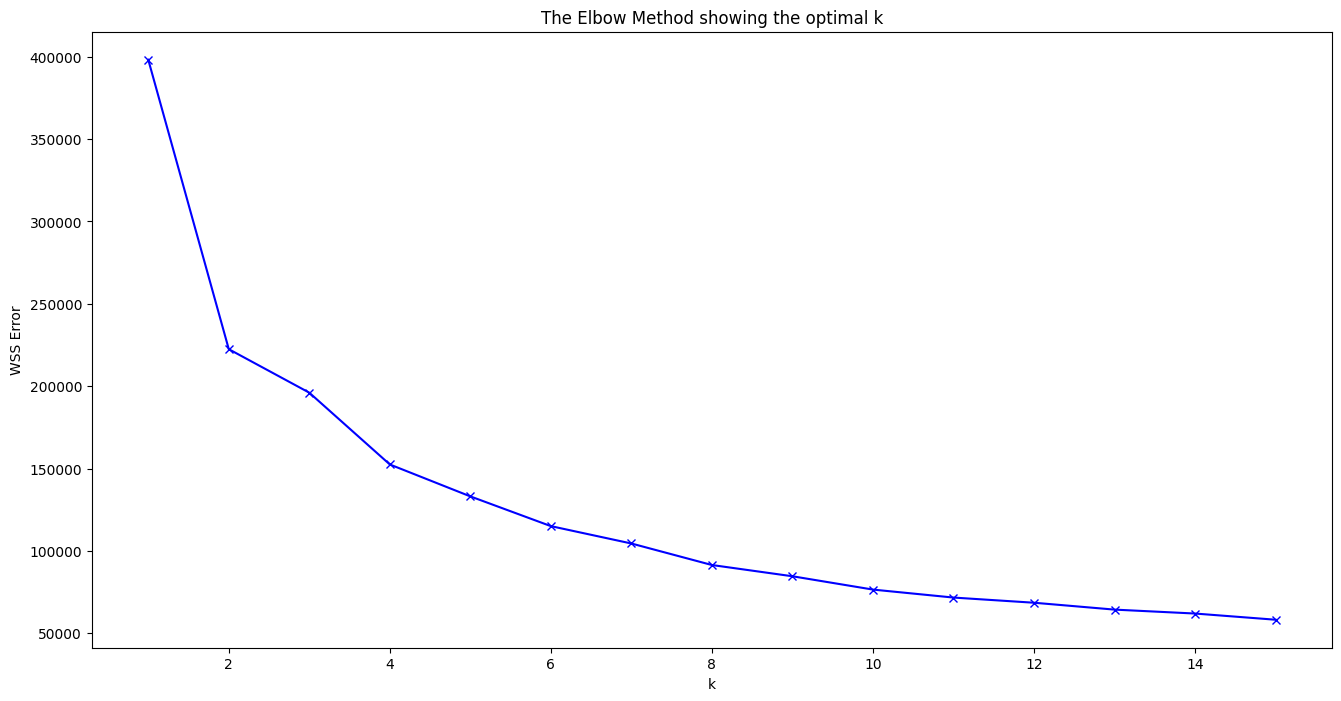

In [40]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
kmeans_model = KMeans(n_clusters=2,
                      random_state=0)
kmeans_model.fit(scaled_df)

KMeans(n_clusters=2, random_state=0)

In [42]:
cluster_labels = kmeans_model.predict(scaled_df)
print(kmeans_model)
print(cluster_labels)

KMeans(n_clusters=2, random_state=0)
[1 0 0 ... 1 1 0]


In [43]:
df['cluster'] = cluster_labels
df.head()

,bathrooms,bedrooms,price,square_feet,cluster
0,1.0,1.0,2195.0,542.0,1
1,1.5,3.0,1250.0,1500.0,0
2,2.0,3.0,1395.0,1650.0,0
3,1.0,2.0,1600.0,820.0,1
4,1.0,1.0,975.0,624.0,1


In [44]:
pd.DataFrame(kmeans_model.cluster_centers_,columns = scaled_df.columns)

,bathrooms,bedrooms,price,square_feet
0,1.022481,0.788718,0.298129,0.725994
1,-0.790427,-0.609717,-0.230468,-0.561228


In [45]:
centers_kmeans = df.groupby(['cluster']).aggregate('mean').reset_index()
centers_kmeans

,cluster,bathrooms,bedrooms,price,square_feet
0,0,2.005302,2.318749,1795.551258,1221.21734
1,1,1.013522,1.272188,1320.221482,751.16442


In [46]:
df.groupby(['cluster'])['cluster'].count()

cluster
0    43379
1    56167
Name: cluster, dtype: int64